In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../../bpepi/bpepi"))))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../../bpepi"))))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../../Analysis/"))))

import bpepi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../../A"))))


In [3]:
import networkx as nx
import numpy as np
import torch
import random

In [4]:
import sys
sys.path.insert(0,'../Analysis')
sys.path.insert(0,'../bpepi')

In [6]:
from gen import simulate_one_detSIR
from bpepi.Modules import fg as fg
from gen import generate_sensors_obs, generate_contacts


In [6]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(1,6)
G.add_edge(0,7)
G.add_edge(7,8)
G.add_edge(8,3)

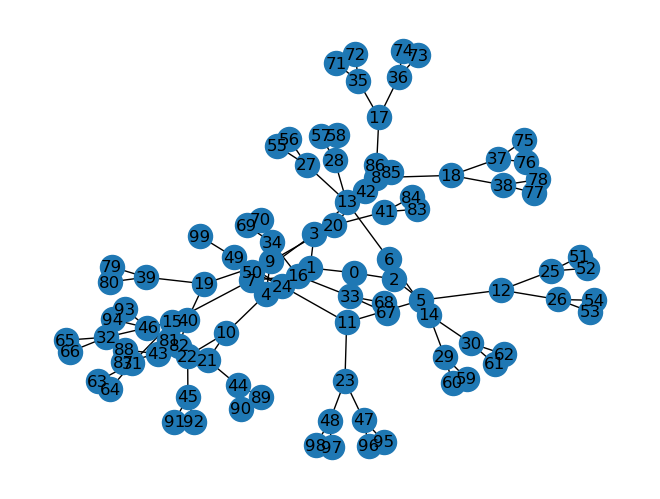

In [7]:
G=nx.full_rary_tree(2,100)

lam=1
T=4
nx.draw(G, with_labels=True)
for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam
contacts = generate_contacts(G,T,lam)


In [8]:
obs=[[3,0,2], [3,1,3]]

In [9]:
N=G.number_of_nodes()
maxit=10000

def print_iter(err, i):
    print(f"\rIteration {i} error {err[1]}", end="")

fg_ = fg.FactorGraph(N,T,contacts,obs,delta=1/N)
i, [error_max, error_mean] = fg_.update(maxit=maxit, print_iter=print_iter, tol=1e-8)

Iteration 12 error 1.0283180559349617e-16

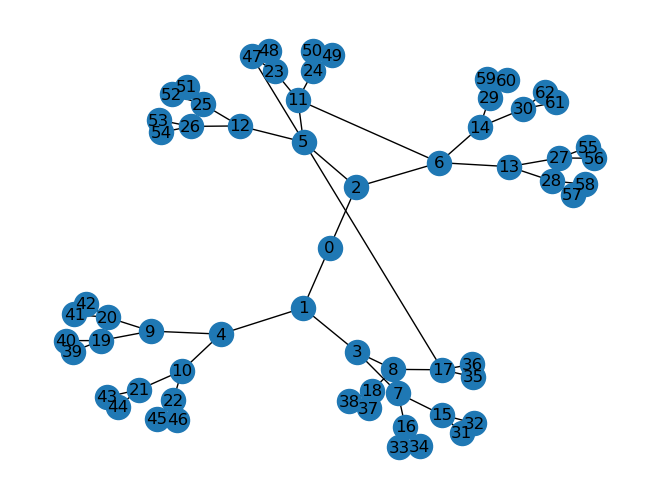

In [84]:
d=2
h=5
lam=1
T=15
G=nx.balanced_tree(d,h)
pos = nx.spring_layout(G, iterations=4000)
G.add_edge(17,47)
#G.add_edge(40,27)
G.add_edge(11,6)
nx.draw(G, with_labels=True, pos=pos)
for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam
contacts = generate_contacts(G,T,lam)


In [85]:
node_obs = 0
T_obs = 5
obs=[[node_obs,0,T_obs-1], [node_obs,1,T_obs]]

In [87]:
fg_ = fg.FactorGraph(N,T,contacts,obs,delta=1/(100*N))
Ms = []
for i in range(maxit):
    i, [error_max, error_mean] = fg_.update(maxit=1, print_iter=print_iter, tol=1e-8)
    Ms.append(fg_.marginals())

Iteration 1 error 0.00150757235758428716

In [88]:
MS = np.array(Ms)

In [89]:
MS.shape

(10000, 63, 17)

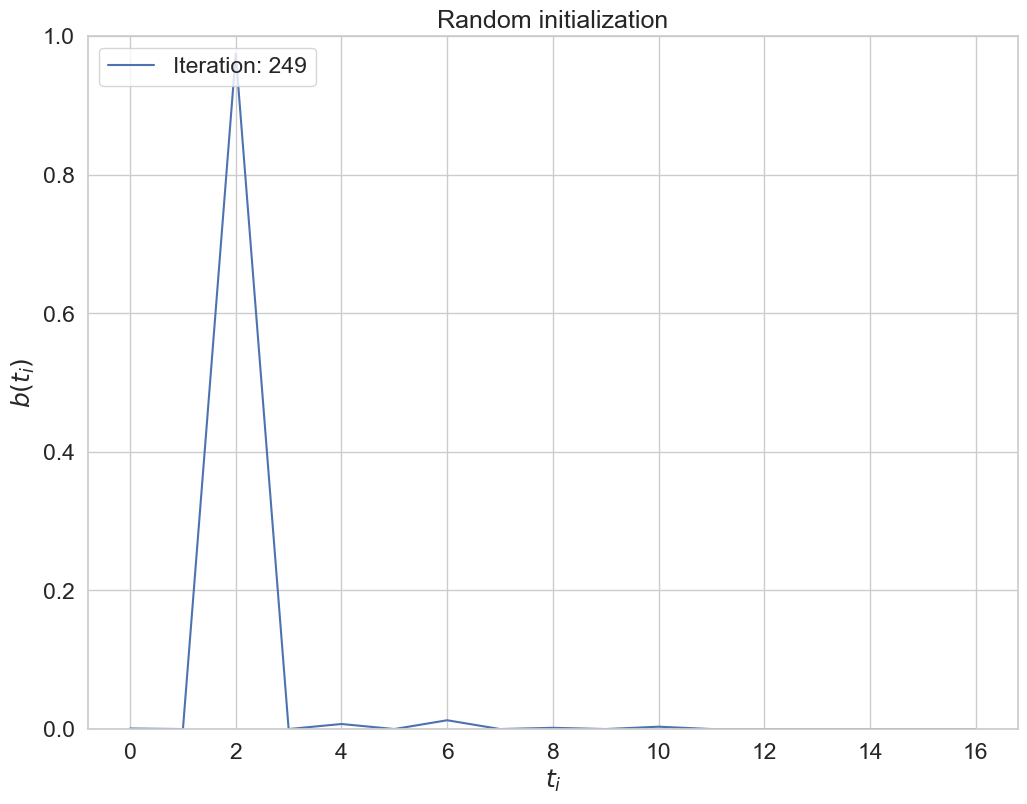

In [95]:
from IPython import display
import matplotlib.animation as animation
sns.set_theme(style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(figsize=(12,9))
ax.set_ylim(( 0,1))
ax.set_xlabel(r"$t_i$")
ax.set_ylabel(r"$b(t_i)$")
ax.set_title("Random initialization")

xx = np.arange(T+2)
yy=MS[:250,35,:]
line, = ax.plot(xx,yy[0],label='Iteration: 0')
ax.legend(loc=2)

def init():
    line.set_data(xx,yy[0])
    #line.set_label('Iteration: 0') 
    return line,
def animate(i):
    lab = f'Iteration: {i}'
    x = xx
    y = yy[i]
    line.set_data(x, y)  # update the data.
    line.set_label(lab) # update the legend
    ax.legend(loc=2)
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=500, frames=250, blit=True)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

In [73]:
M = fg_.marginals()
M[:,0].sum()

0.5844264587954404

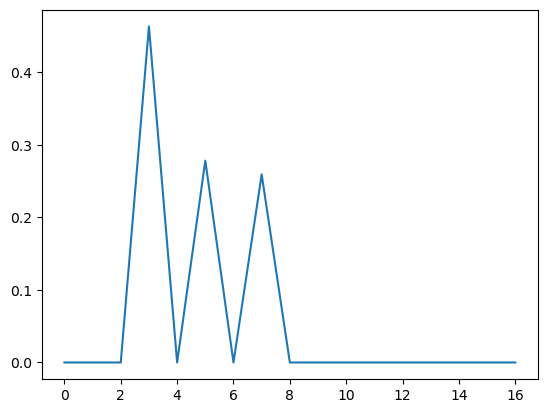

In [74]:
import matplotlib.pyplot as plt

plt.plot(M[3])

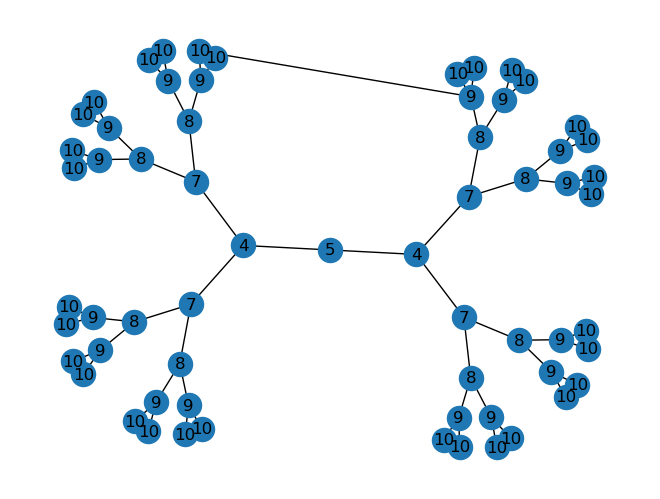

In [69]:
ll = {}
for n in G.nodes():
    ll[n] = M[n].argmax()

nx.draw(G, with_labels="max_it", pos=pos, labels=ll)


In [20]:
M.shape

(63, 12)

In [14]:
N=G.number_of_nodes()
maxit=10000

def print_iter(err, i):
    print(f"\rIteration {i} error {err[1]}", end="")

fg_ = fg.FactorGraph(N,T,contacts,obs,delta=1/N)
i, [error_max, error_mean] = fg_.update(maxit=maxit, print_iter=print_iter, tol=1e-8)

Iteration 1 error nan

In [23]:
N=G.number_of_nodes()

maxit=10000

print(N,T)

def print_iter(err, i):
    print(f"\rIteration {i} error {err[1]}", end="")

fg_ = fg.FactorGraph(N,T,contacts,obs,delta=1/N)

i, [error_max, error_mean] = fg_.update(maxit=maxit, print_iter=print_iter, tol=1e-8)

63 6
Iteration 1 error nan

/Users/ocadni/git/bpepi/bpepi/Modules/fg.py:220: RuntimeWarning: invalid value encountered in divide
  norm_msgs = new_msgs / norm


In [54]:
T=10

In [20]:
G=nx.full_rary_tree(2,100)

lam=0.9999

#G.add_edge(3,11)

#nx.draw(G, with_labels=True, pos=nx.spring_layout(G, iterations=10000))

for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam

contacts = generate_contacts(G,T,lam)

In [21]:
T

4

In [22]:
N

100

In [23]:
contacts

[(0, 1, 0, 0.9999),
 (1, 0, 0, 0.9999),
 (0, 2, 0, 0.9999),
 (2, 0, 0, 0.9999),
 (1, 3, 0, 0.9999),
 (3, 1, 0, 0.9999),
 (1, 4, 0, 0.9999),
 (4, 1, 0, 0.9999),
 (2, 5, 0, 0.9999),
 (5, 2, 0, 0.9999),
 (2, 6, 0, 0.9999),
 (6, 2, 0, 0.9999),
 (3, 7, 0, 0.9999),
 (7, 3, 0, 0.9999),
 (3, 8, 0, 0.9999),
 (8, 3, 0, 0.9999),
 (4, 9, 0, 0.9999),
 (9, 4, 0, 0.9999),
 (4, 10, 0, 0.9999),
 (10, 4, 0, 0.9999),
 (5, 11, 0, 0.9999),
 (11, 5, 0, 0.9999),
 (5, 12, 0, 0.9999),
 (12, 5, 0, 0.9999),
 (6, 13, 0, 0.9999),
 (13, 6, 0, 0.9999),
 (6, 14, 0, 0.9999),
 (14, 6, 0, 0.9999),
 (7, 15, 0, 0.9999),
 (15, 7, 0, 0.9999),
 (7, 16, 0, 0.9999),
 (16, 7, 0, 0.9999),
 (8, 17, 0, 0.9999),
 (17, 8, 0, 0.9999),
 (8, 18, 0, 0.9999),
 (18, 8, 0, 0.9999),
 (9, 19, 0, 0.9999),
 (19, 9, 0, 0.9999),
 (9, 20, 0, 0.9999),
 (20, 9, 0, 0.9999),
 (10, 21, 0, 0.9999),
 (21, 10, 0, 0.9999),
 (10, 22, 0, 0.9999),
 (22, 10, 0, 0.9999),
 (11, 23, 0, 0.9999),
 (23, 11, 0, 0.9999),
 (11, 24, 0, 0.9999),
 (24, 11, 0, 0.9999),
 (

In [24]:
N=G.number_of_nodes()

maxit=10000

node_obs = 2
T_obs = 3
obs=[[node_obs,0,T_obs], [node_obs,1,T_obs]]

def print_iter(err, i):
    print(f"\rIteration {i} error {err[1]}", end="")

fg_ = fg.FactorGraph(N,T,contacts,obs,delta=1/N)

i, [error_max, error_mean] = fg_.update(maxit=maxit, print_iter=print_iter, tol=1e-8)

Iteration 1 error nan

Iteration 1 error nan

1.0

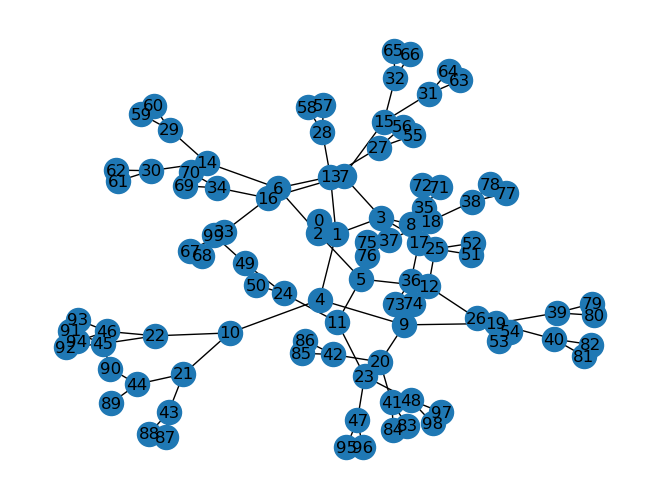

In [25]:
G=nx.full_rary_tree(2,100)

G.add_edge(1,13)
G.add_edge(3,25)
G.add_edge(90,45)

nx.draw(G, with_labels=True)

for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam

contacts = generate_contacts(G,T,lam)

N=G.number_of_nodes()
maxit=10000

def print_iter(err, i):
    print(f"\rIteration {i} error {err[1]}", end="")

fg_ = fg.FactorGraph(N,T,contacts,obs,delta=1/N)
i, [error_max, error_mean] = fg_.update(maxit=maxit, print_iter=print_iter, tol=1e-8)
M = fg_.marginals()
M[0, :].sum()

## Random Regular Graph

In [6]:
N=10000
d=3
lam=1
delta=0.
seed=0
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
G=nx.random_regular_graph(d,N)
for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam
if (N<500) : nx.draw(G)

In [7]:
def compute_dist(G):
    aa = dict(nx.all_pairs_shortest_path_length(G))
    dist = np.zeros((N,N))
    for a in aa:
        for aaa in aa[a]:
            dist[a,aaa] = aa[a][aaa]
    print(f"max dist: {np.max(dist)}")
    return dist
dist = compute_dist(G)

max dist: 17.0


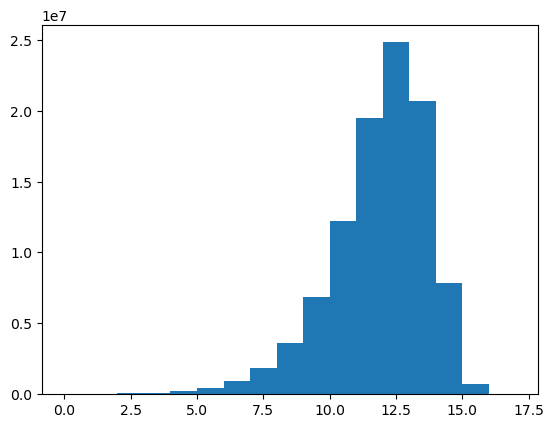

In [9]:
import matplotlib.pyplot as plt
res = plt.hist(dist.reshape(-1), bins=int(dist.max()))

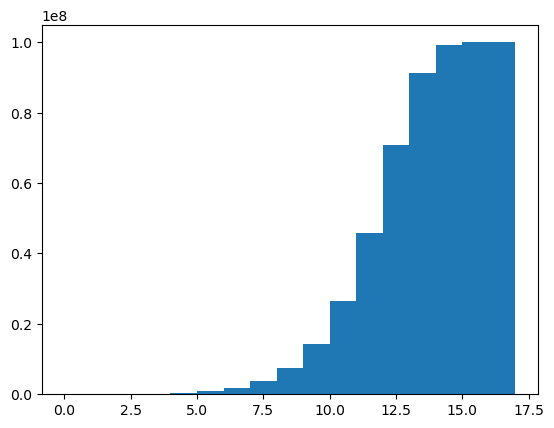

In [10]:
res = plt.hist(dist.reshape(-1), bins=int(dist.max()), cumulative=True)

#### Observations

In [80]:
from functools import reduce
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

def func_allpairs_overlap_old( F, a, b ):
    """ -> array len(a) x len(b):
        [[ F( a0 b0 )  F( a0 b1 ) ... ]
         [ F( a1 b0 )  F( a1 b1 ) ... ]
         ...
        ]
    """
    def fab( i, j ):
        return F( a[i], b[j] )  # F scalar or vec, e.g. gradient
    
    return np.fromfunction( fab, (a.shape[0], b.shape[0]), dtype=int )  # -> fab( all pairs )

def func_allpairs_overlap(F, a, b ):
    #print(a)
    res = np.zeros((a.shape[0], b.shape[0]))
    for q_i in range(a.shape[0]):
        res[q_i] = func_overlap(a[q_i], b)
    return res

def func_overlap( x, y ):
    return np.abs(x-y).sum(axis=1)

def print_iter(err, i):
    print(f"\rIteration {i} error {err[1]}", end="")

def observ(obs, snn):
    observed = np.unique(np.array([x[0] for x in obs]))
    obs_time = []
    for nn in observed:
        obs_time.append(np.nonzero(snn[:, nn] == 1)[0][0])
    return observed, obs_time

def comp_corr(dist, confs, max_sample = 1000):
    if len(confs) <= 1:
        return [], [], []
    x = []
    y = []
    y1 = []
    for t in np.arange(confs.max()):
        indexs = np.argwhere(dist == t)
        x.append(t)
        temp = []
        temp1 = []
        ran = np.random.shuffle(indexs)
        ii = 0
        mm = 0
        #print(t)
        while ii <  min(max_sample, len(indexs)):
            cc,_ = pearsonr(confs[:,indexs[mm][0]], confs[:,indexs[mm][1]])
            if cc != np.nan:
                temp.append(cc)
                ii += 1
            mm+=1
            #print(cc, ii, mm)
            if mm == len(indexs):
                break
        #print(temp)
        temp1 = np.abs(np.array(temp))
        y.append(np.nanmean(temp))
        y1.append(np.nanmean(temp1))
    return x, y, y1

def overlap(conf, dist, max_sample = 100):
    if len(conf) == 0:
        return 0
    if len(conf) == 1:
        return 1
    max_sample = min(len(conf), max_sample)
    conf =conf[:max_sample]
    over = func_allpairs_overlap(func_overlap, conf, conf)
    T = max(dist.max(), conf.max())
    over = 1 - over / (T*conf.shape[1])
    return over

def exact_confs(obs, snn, dist):
    observed, obs_time = observ(obs, snn)
    if len(observed) == 0:
        return dist

    poss_sources = []
    for ii, obs_i in enumerate(observed):
        obs_t = obs_time[ii]
        poss_sources.append(np.argwhere(dist[:,obs_i] == obs_t).flatten())
    sources = reduce(np.intersect1d, poss_sources).astype(int)
    confs = dist[sources]
    #x, y, y1 = comp_corr(obs, snn, confs)
    return confs




In [13]:
from gen import generate_sensors_obs, generate_contacts
import importlib
from bpepi.Modules import fg_torch 

importlib.reload(fg_torch)
from bpepi.Modules import fg_torch as fg
dtype = torch.float32
maxit =100
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
snn = np.array(simulate_one_detSIR(G, s_type = "n_sources", S = 1, mask = ["SI"], T_max=100))
T = len(snn) - 1
contacts = generate_contacts(G,T,lam)
corr_list = []
overs = []
for num_obs in np.arange(0, 10):
    obs = generate_sensors_obs(snn, o_type="n_obs", M=num_obs)
    print("Number of sensors: ", num_obs)
    confs = exact_confs(obs, snn, dist)
    print("number of configurations: ", len(confs))
    corr_list.append(comp_corr(dist, confs, max_sample = 1000))
    overs.append(overlap(confs, dist, max_sample = 100))
    fg_ = fg.FactorGraph(N,T,contacts,obs,delta=1/N, dtype=dtype)
    i, [error_max, error_mean] = fg_.update(maxit=maxit, print_iter=print_iter, tol=1e-5)
    ii, [error_max, error_mean] = fg_.update(maxit=maxit, print_iter=print_iter, tol=1e-5, damp=0.2)
    iii, [error_max, error_mean] = fg_.update(maxit=5*maxit, print_iter=print_iter, tol=1e-5, damp=0.5)
    print(f"\nNumber of iterations: {i+ii+iii}, err:{error_mean:.2f}")
    

NameError: name 'seed' is not defined

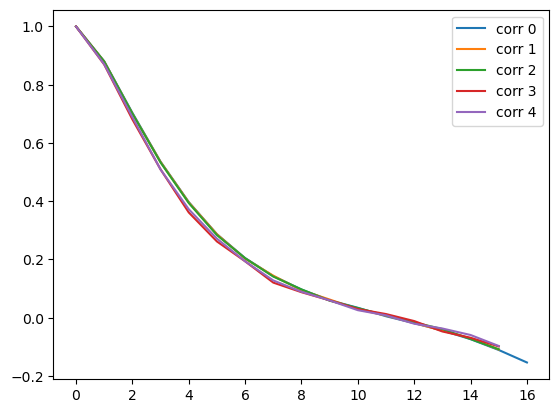

In [82]:
import matplotlib.pyplot as plt
nobs = 0
for x, y, y1 in corr_list:
    if len(x) > 0:
        plt.plot(x, y, label = f"corr {nobs}")
    #plt.plot(x, y1, label = f"corr abs {nobs}")
        nobs += 1
plt.legend()

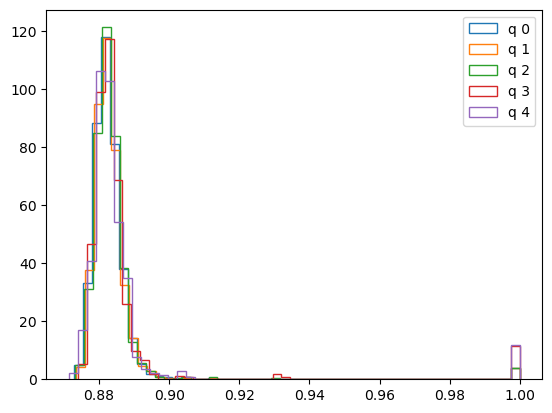

In [93]:
import matplotlib.pyplot as plt
nobs = 0
for over in overs:
    try:
        plt.hist(over.flatten(), label = f"q {nobs}", bins=50, density=True,histtype='step')
    except:
        pass
        #plt.plot(x, y1, label = f"corr abs {nobs}")
    nobs += 1
plt.legend()

In [23]:
from gen import generate_sensors_obs
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
from bpepi.Modules import fg as fg

for num_obs in np.arange(1, 20):
    obs = generate_sensors_obs(snn, o_type="n_obs", M=num_obs)
    print("Number of sensors: ", num_obs)
    print(obs)
    fg_ = fg.FactorGraph(N,T,contacts,obs,delta=1/N)
    i, [error_max, error_mean] = fg_.update(maxit=maxit, print_iter=print_iter, tol=1e-5)
    ii, [error_max, error_mean] = fg_.update(maxit=maxit, print_iter=print_iter, tol=1e-5, damp=0.2)
    iii, [error_max, error_mean] = fg_.update(maxit=5*maxit, print_iter=print_iter, tol=1e-5, damp=0.5)
    print(f"\nNumber of iterations: {i+ii+iii}, err:{error_mean:.2f}")
    

Number of sensors:  1
[(6311, 0, 11), (6311, 1, 12), (6311, 1, 15)]
Iteration 50 error 3.417110138870904e-055
Number of iterations: 70, err:0.00
Number of sensors:  2
[(663, 0, 9), (663, 1, 10), (6890, 0, 12), (6890, 1, 13), (663, 1, 15), (6890, 1, 15)]
Iteration 50 error 5.3509109384346143e-05
Number of iterations: 70, err:0.00
Number of sensors:  3
[(8376, 0, 10), (8376, 1, 11), (4242, 0, 12), (7961, 0, 12), (4242, 1, 13), (7961, 1, 13), (4242, 1, 15), (7961, 1, 15), (8376, 1, 15)]
Iteration 50 error 0.00020249392744523266
Number of iterations: 70, err:0.00
Number of sensors:  4
[(5866, 0, 9), (6634, 0, 9), (5866, 1, 10), (6634, 1, 10), (7808, 0, 10), (7808, 1, 11), (4969, 0, 12), (4969, 1, 13), (4969, 1, 15), (5866, 1, 15), (6634, 1, 15), (7808, 1, 15)]
Iteration 50 error 0.00013662044498138032
Number of iterations: 70, err:0.00
Number of sensors:  5
[(2281, 0, 9), (4617, 0, 9), (2281, 1, 10), (4617, 1, 10), (8268, 0, 10), (3578, 0, 11), (8268, 1, 11), (3578, 1, 12), (9558, 0, 13), 

KeyboardInterrupt: 

Number of sensors:  1
[(6311, 0, 11), (6311, 1, 12), (6311, 1, 15)]
Iteration 50 error 3.413994636503048e-055
Number of iterations: 70, err:0.00
Number of sensors:  2
[(663, 0, 9), (663, 1, 10), (6890, 0, 12), (6890, 1, 13), (663, 1, 15), (6890, 1, 15)]
Iteration 8 error 0.004021603148430586tensor(1574746261)
Iteration 9 error nantensor(13916517849)
Iteration 1 error nantensor(30684024166)
Iteration 1 error nan
Number of iterations: 11, err:nan
Number of sensors:  3
[(8376, 0, 10), (8376, 1, 11), (4242, 0, 12), (7961, 0, 12), (4242, 1, 13), (7961, 1, 13), (4242, 1, 15), (7961, 1, 15), (8376, 1, 15)]
Iteration 8 error 0.004056698642671108tensor(9084327740)
Iteration 9 error nantensor(35996294717)
Iteration 1 error nantensor(78383447578)
Iteration 1 error nan
Number of iterations: 11, err:nan
Number of sensors:  4
[(5866, 0, 9), (6634, 0, 9), (5866, 1, 10), (6634, 1, 10), (7808, 0, 10), (7808, 1, 11), (4969, 0, 12), (4969, 1, 13), (4969, 1, 15), (5866, 1, 15), (6634, 1, 15), (7808, 1, 15

KeyboardInterrupt: 

In [ ]:
fg_.update(maxit=1000)

(20, [0.0004892894753455168, 7.337264126716967e-07])

In [22]:
marg = fg_.marginals()

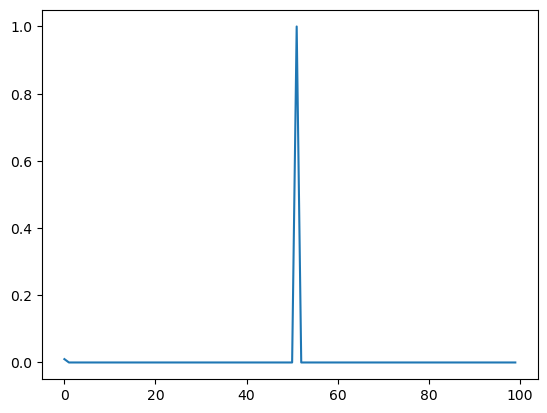

In [23]:
# Plotting the probability of each node to be infected at the starting time (probability to be the source)
plt.plot(marg[:,0])

In [14]:
if snn[:,int(np.argmax(marg[:,0]))][0]==1:
    print("Source correctly identified")
else: print("Source not identified")

Source correctly identified
